<a href="https://colab.research.google.com/github/Jasmine-kaur8/Malignant_project/blob/main/Malignant_Comments_Classifier_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from google.colab import files                            
uploaded = files.upload()

Saving train_data_malignant_project.xlsx to train_data_malignant_project (3).xlsx


In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
                                        
import warnings
warnings.filterwarnings('ignore')

In [75]:
#Loading the data
data = pd.read_excel('train_data_malignant_project.xlsx')

In [76]:
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [77]:
data.shape

(159571, 8)

In [78]:
columns = ['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']

In [79]:
columns

['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [80]:
#Let's check value counts in each column to exolre dataset more deeply
print("Column-wise value counts are as:-")
for column in columns:
    print("\n Value count in ",column,"column is\n " ,data[column].value_counts())

Column-wise value counts are as:-

 Value count in  malignant column is
  0    144277
1     15294
Name: malignant, dtype: int64

 Value count in  highly_malignant column is
  0    157976
1      1595
Name: highly_malignant, dtype: int64

 Value count in  rude column is
  0    151122
1      8449
Name: rude, dtype: int64

 Value count in  threat column is
  0    159093
1       478
Name: threat, dtype: int64

 Value count in  abuse column is
  0    151694
1      7877
Name: abuse, dtype: int64

 Value count in  loathe column is
  0    158166
1      1405
Name: loathe, dtype: int64


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159449 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [82]:
data.isnull().sum()

id                    0
comment_text        122
malignant             0
highly_malignant      0
rude                  0
threat                0
abuse                 0
loathe                0
dtype: int64

In [83]:
data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
data.dropna(inplace = True)

In [85]:
data = data.reset_index()
del data['index']

In [86]:
data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159444,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159445,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159446,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159447,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [87]:
#EDA

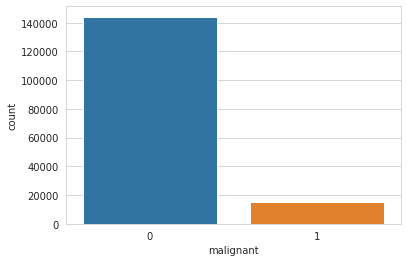

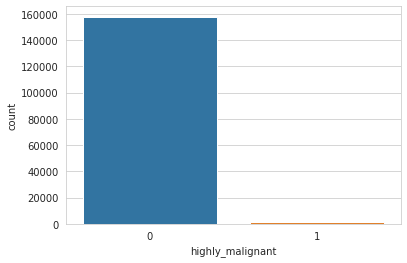

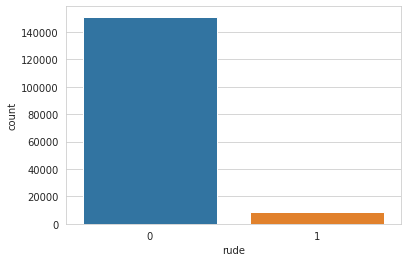

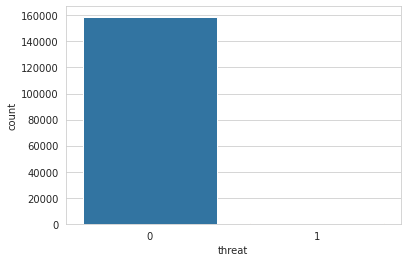

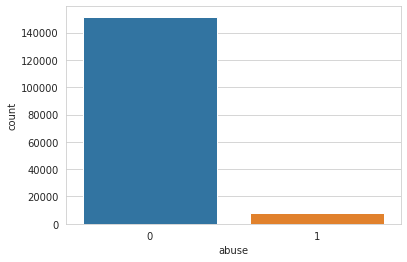

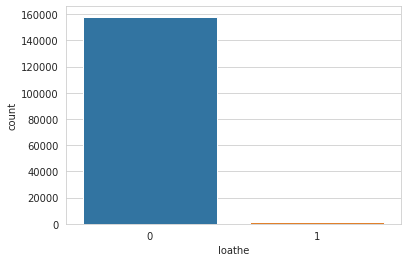

In [88]:
#countplot for each feature

for col in columns:
  sns.countplot(data[col])
  plt.show()

While maximum Categories belong to Malignant, a lot of comments are abusive and rude as well; while threat comments are the minimum

In [89]:
#counting the number of counts for each feature

count = data.iloc[:,2:].sum()
count

malignant           15268
highly_malignant     1593
rude                 8432
threat                475
abuse                7865
loathe               1404
dtype: int64

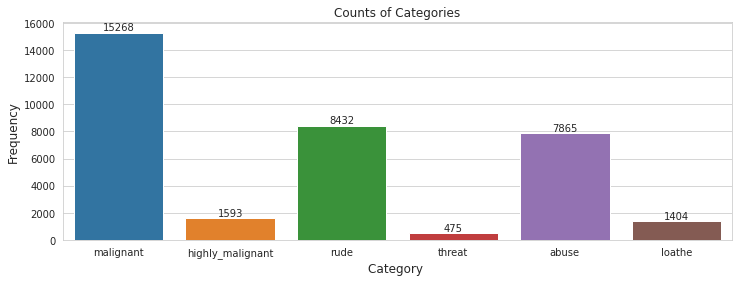

In [90]:
#Plotting the counts of each category
plt.figure(figsize=(12,4))
ax = sns.barplot(count.index, count.values)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

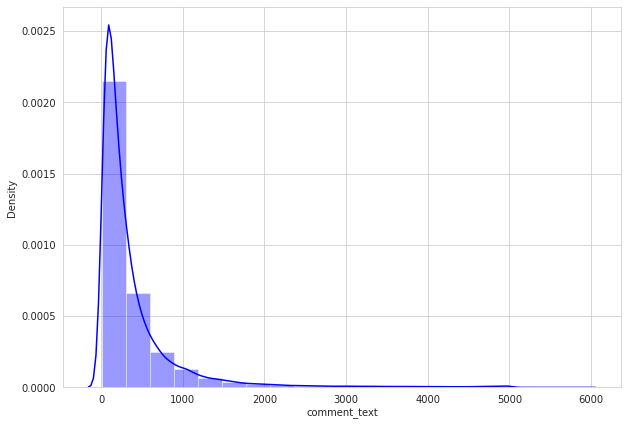

In [91]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = data.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

The graph shows the comment length frequency. The graph is right skewed. This means that most of the comments are short in length. The maximum length is 5000 words and minimum length is 5 words.

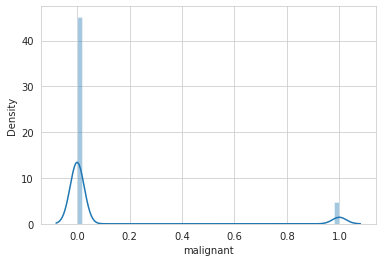

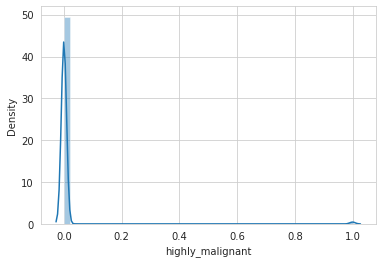

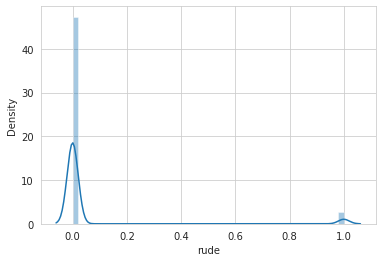

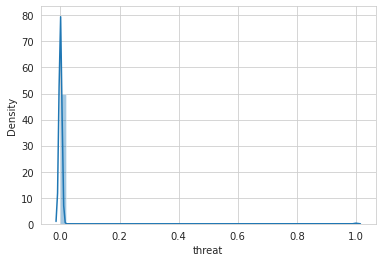

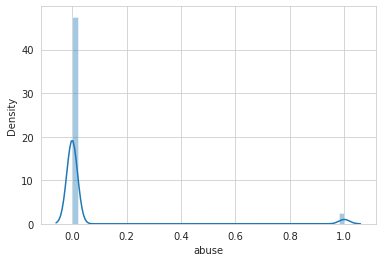

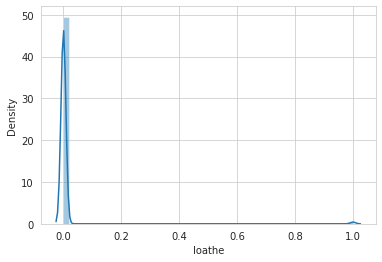

In [92]:
#Plotting distplot for checking the distribution of data
for col in data.describe().columns:
    sns.distplot(data[col])
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc814549310>,
      dtype=object)

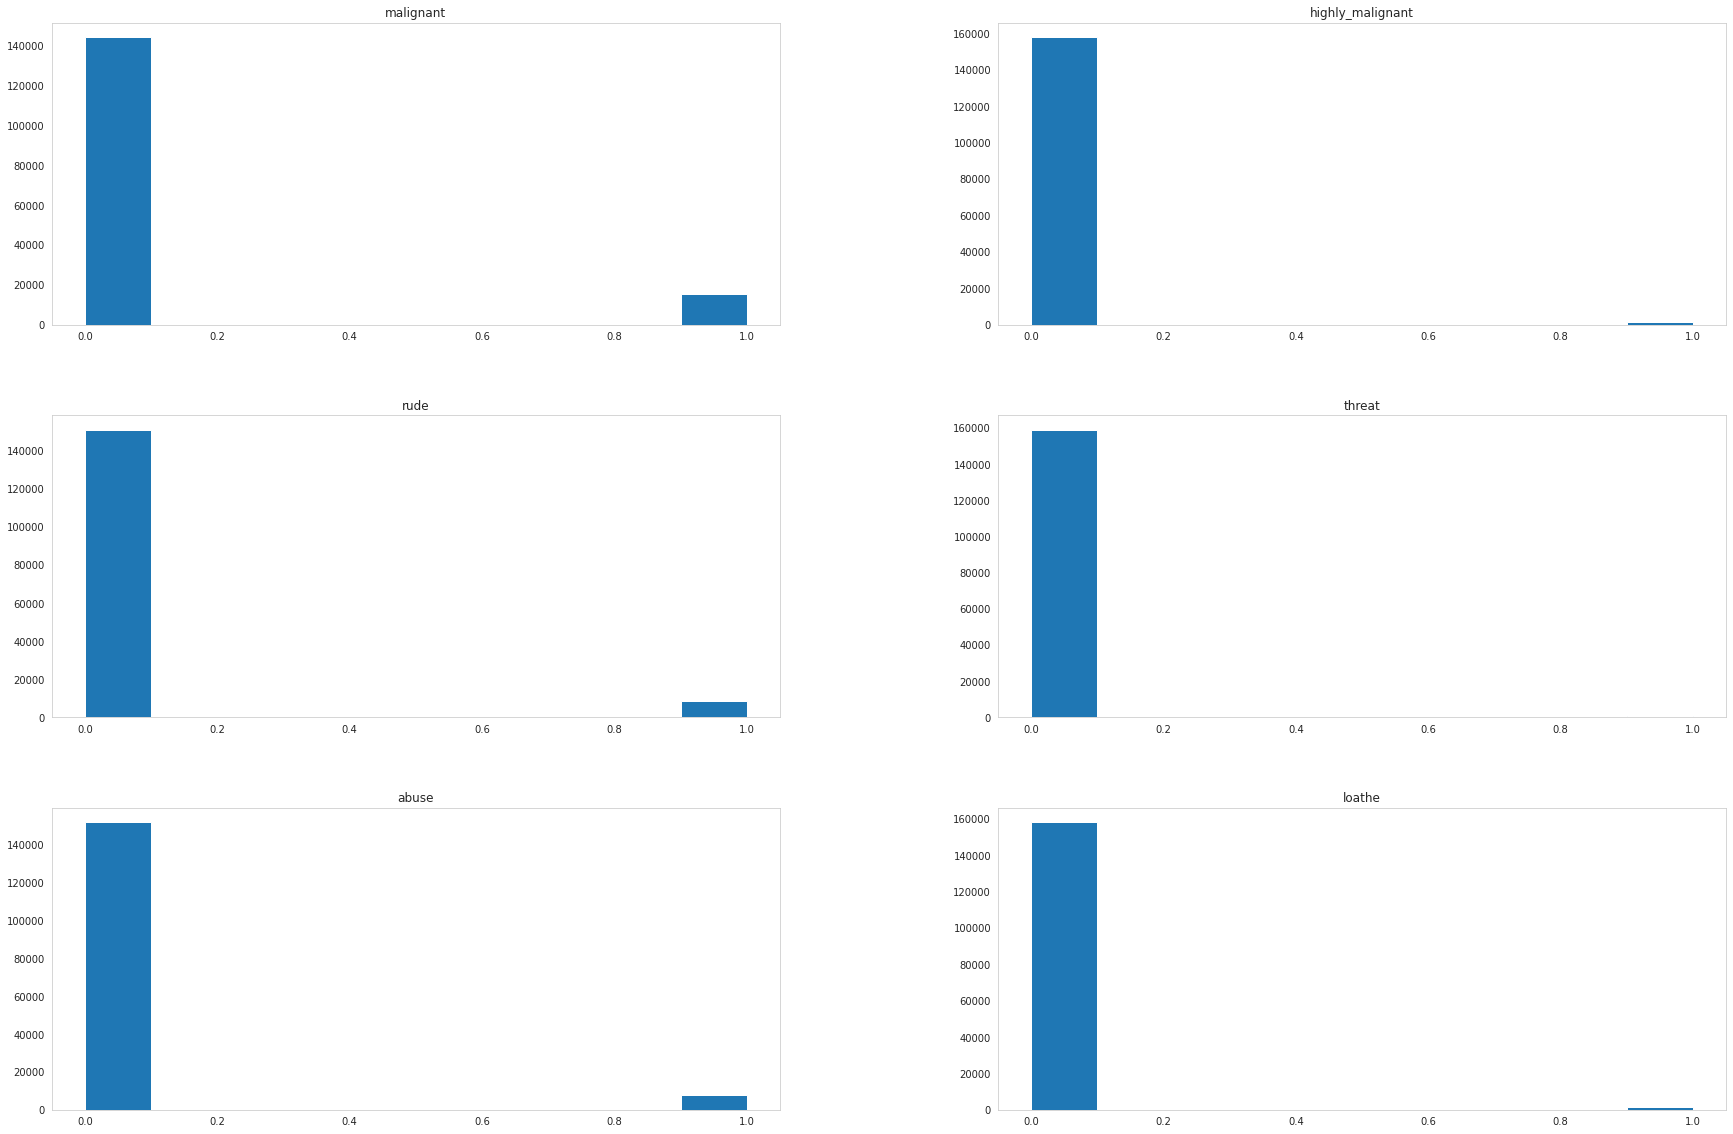

In [93]:
data.hist(figsize = (30,20), grid = False)

In [94]:
#Checking correlation of the dataset
corr=data.corr()  #corr() function provides the correlation value of each column
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308703,0.676323,0.156634,0.647520,0.266140
highly_malignant,0.308703,1.000000,0.403155,0.124105,0.376076,0.201134
rude,0.676323,0.403155,1.000000,0.141344,0.741141,0.286992
threat,0.156634,0.124105,0.141344,1.000000,0.150163,0.115564
abuse,0.647520,0.376076,0.741141,0.150163,1.000000,0.337829
loathe,0.266140,0.201134,0.286992,0.115564,0.337829,1.000000


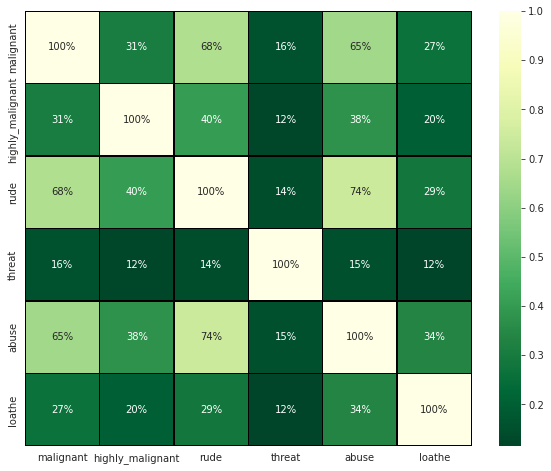

In [95]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='YlGn_r',annot=True)
plt.show()

The highest positive correlation is seen in between fields 'rude' and 'abuse'.
Attribute 'threat' is negatively correlated with each and every other feature of this training dataset.
Overall the correlation among the attributes is not positive.

In [96]:
#As ID is not much important, we can drop from the dataset
data.drop('id',axis=1,inplace=True)

DATA PRE-PROCESSING

In [97]:
#Creating a 'label' column in the train dataset
#Label column is the sum of all the target features
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
data[comments_labels].sum()

malignant           15268
highly_malignant     1593
rude                 8432
threat                475
abuse                7865
loathe               1404
dtype: int64

In [98]:
data['label'] = data[comments_labels].sum(axis=1)
data.head(10)  #Checking the dataset after adding it

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


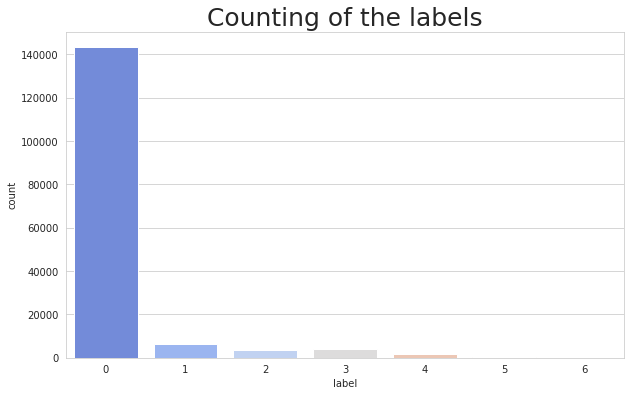

In [99]:
#Checking the count of labels
plt.figure(figsize=(10,6))
sns.countplot(data['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [100]:
data['label'].value_counts()

0    143250
1      6353
3      4198
2      3474
4      1759
5       384
6        31
Name: label, dtype: int64

In [101]:
#Scaling the label column
data['label'] = data['label'] >0
data['label'] = data['label'].astype(int)
data.head(20)    #Checking the data after scaling

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


0    143250
1     16199
Name: label, dtype: int64


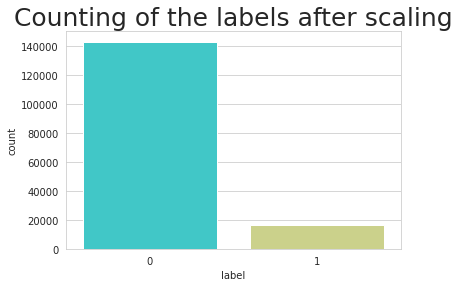

In [102]:
#Checking the counting of labels after scaling
print(data['label'].value_counts())
sns.countplot(data['label'], palette='rainbow')
plt.title('Counting of the labels after scaling',fontsize=25)
plt.show()

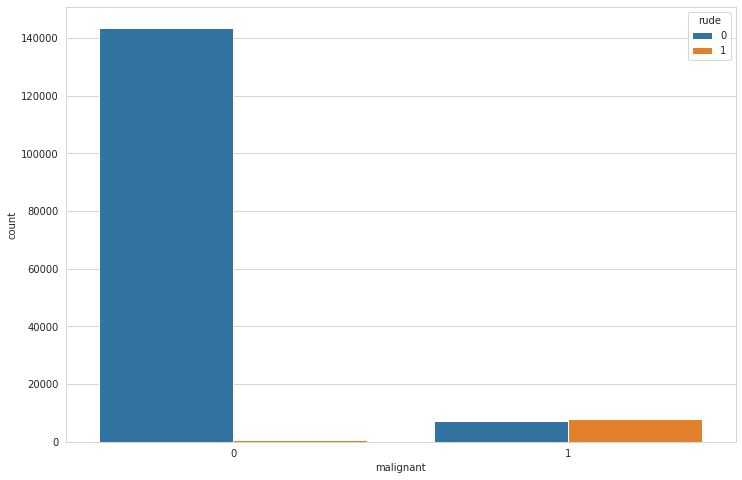

In [103]:
plt.figure(figsize=(12,8))
sns.countplot(data['malignant'],hue=data['rude'])

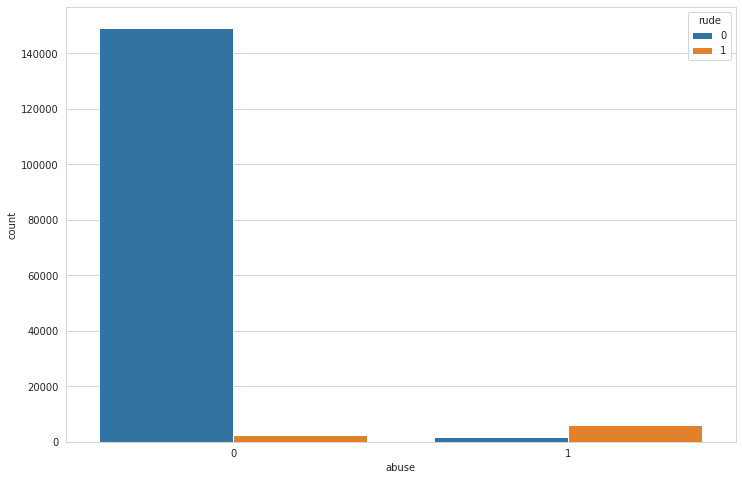

In [104]:
plt.figure(figsize=(12,8))
sns.countplot(data['abuse'],hue=data['rude'])


In [105]:
lambda comment_text: len(comment_text)

<function __main__.<lambda>>

In [106]:
#the length of the each comment respectively in a column 'comment_text' 
data['length_before_cleaning'] = comment_len
data

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264.0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112.0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233.0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622.0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67.0
...,...,...,...,...,...,...,...,...,...
159444,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295.0
159445,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99.0
159446,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81.0
159447,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116.0


In [107]:
data.isna().sum()

comment_text               0
malignant                  0
highly_malignant           0
rude                       0
threat                     0
abuse                      0
loathe                     0
label                      0
length_before_cleaning    57
dtype: int64

In [108]:
data.dropna(inplace = True)

In [109]:
data = data.reset_index()

In [110]:
del data['index']

In [111]:
data

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264.0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112.0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233.0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622.0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67.0
...,...,...,...,...,...,...,...,...,...
159387,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295.0
159388,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99.0
159389,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81.0
159390,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116.0


In [112]:
data['length_before_cleaning'] = data['length_before_cleaning'].astype(int)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159392 entries, 0 to 159391
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   comment_text            159392 non-null  object
 1   malignant               159392 non-null  int64 
 2   highly_malignant        159392 non-null  int64 
 3   rude                    159392 non-null  int64 
 4   threat                  159392 non-null  int64 
 5   abuse                   159392 non-null  int64 
 6   loathe                  159392 non-null  int64 
 7   label                   159392 non-null  int64 
 8   length_before_cleaning  159392 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 10.9+ MB


PREPROCESSING USING NLP

In [114]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [115]:
#Defining the stop words
nltk.download('stopwords')

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
#Replacing '\n' in comment_text
data['comment_text'] = data['comment_text'].replace('\n',' ')

In [117]:
#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [118]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [119]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
nltk.download('punkt')
nltk.download('wordnet')
data['comment_text'] = data['comment_text'].apply(clean_comments)
data['comment_text']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159387    second time asking view completely contradicts...
159388                 ashamed horrible thing put talk page
159389    spitzer umm there actual article prostitution ...
159390    look like actually put speedy first version de...
159391    really think understand came idea bad right aw...
Name: comment_text, Length: 159392, dtype: object

PLOTTING WORDCLOUD FOR EACH FEATURE

In [120]:
data_malignant = data[(data['malignant']==1)]
data_malignant

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44
12,hey talk exclusive group wp taliban good destr...,1,0,0,0,0,0,1,319
16,bye look come think comming back tosser,1,0,0,0,0,0,1,57
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40
...,...,...,...,...,...,...,...,...,...
159315,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677
159335,mischievious pubic hair,1,0,0,0,1,0,1,33
159362,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346
159367,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0,1,534


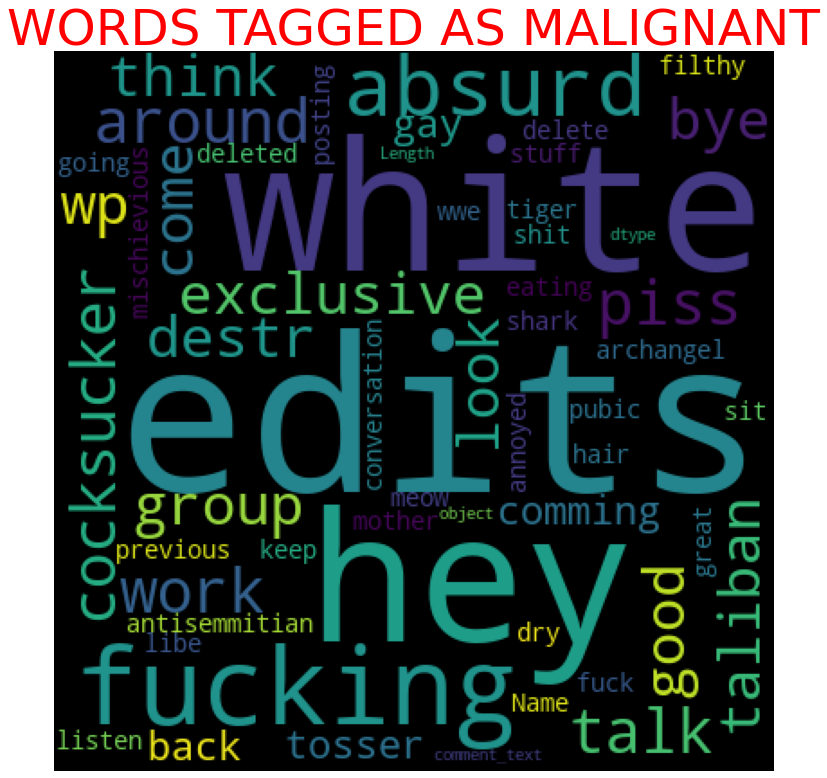

In [121]:
#Plotting for malignant
wordcloud = WordCloud(height=400,width=400,max_words=900).generate(str(data_malignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [122]:
data_highlymalignant = data[(data['highly_malignant'] == 1)]
data_highlymalignant

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89
180,stupid fuck mother cunt stink,1,1,1,0,1,0,1,53
441,hi im fucking bitch,1,1,1,0,1,0,1,40
578,motherfucking piece crap fuckhead blocking u,1,1,1,0,1,0,1,67
...,...,...,...,...,...,...,...,...,...
158918,filthy stinking crow back dirty crow better de...,1,1,1,0,1,0,1,251
158921,fucking pathetic moron cc jimbo wale rootmyass,1,1,1,0,1,0,1,62
159102,lol gay never know good feel fuck woman as,1,1,1,0,1,1,1,87
159133,walter mercado antonio quite frankly fucker co...,1,1,1,0,1,0,1,192


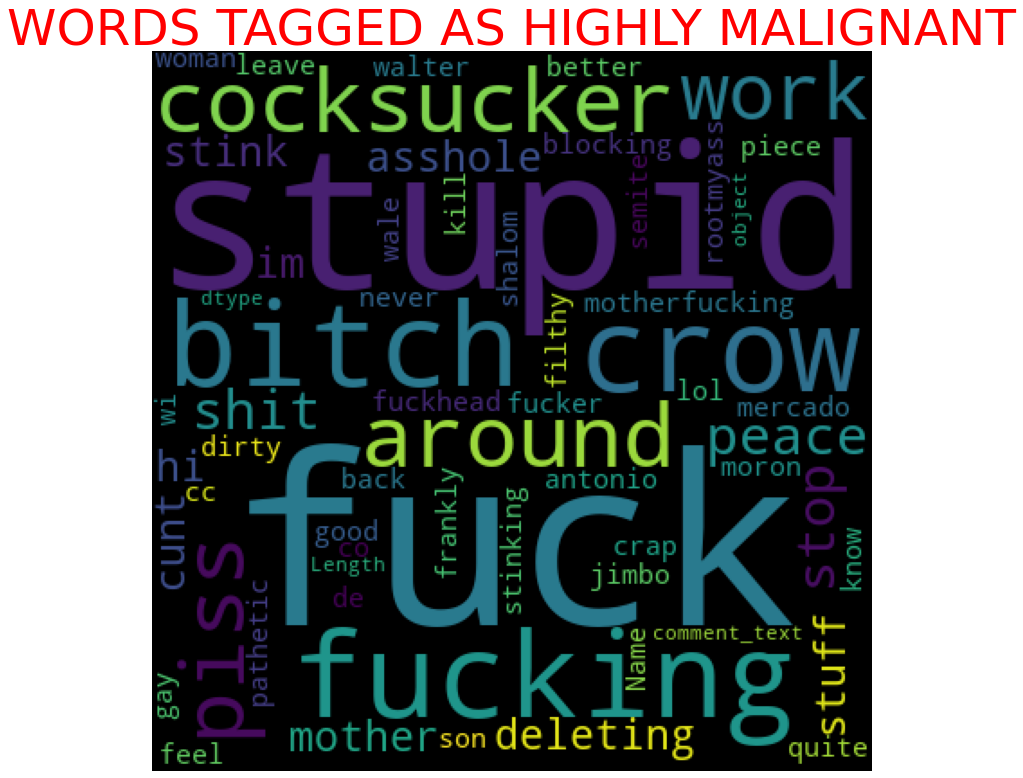

In [123]:
#Plotting for highly_malignant
wordcloud = WordCloud(height=400,width=400,max_words=800).generate(str(data_highlymalignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [124]:
data_rude = data[(data['rude'] == 1)]
data_rude

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40
51,get fucked get fuckeeed got drink cant put get...,1,0,1,0,0,0,1,124
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89
...,...,...,...,...,...,...,...,...,...
159232,fat piece shit obese piece shit thought naked ...,1,0,1,0,1,0,1,91
159314,fucking faggot lolwat,1,0,1,0,1,0,1,24
159315,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677
159362,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346


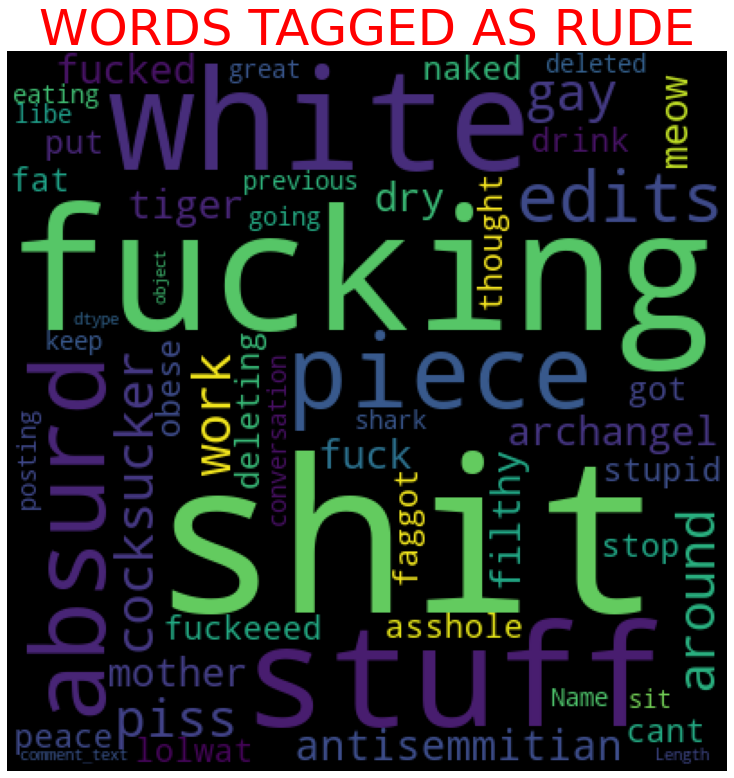

In [125]:
#Plotting for rude
wordcloud = WordCloud(height=400,width=400,max_words=700).generate(str(data_rude['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [126]:
data_threat = data[(data['threat'] == 1)]
data_threat

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
78,hi back last warning stop undoing edits die,1,0,0,1,0,0,1,64
175,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,1,128
599,also sock puppet account suprise sincerely man...,1,0,0,1,0,0,1,138
801,fuck smith please notified die want dance grave,1,0,1,1,1,0,1,85
1016,first time bitch fuck find live sodomize wife ...,1,1,1,1,1,1,1,150
...,...,...,...,...,...,...,...,...,...
157542,bitch fucking hore suck dick big as hole gay f...,1,0,1,1,1,1,1,316
158539,stupid head dumb stupid die die die go suck butt,1,0,1,1,1,0,1,69
158678,hey hey faggot dead yet watching mom getting r...,1,1,1,1,1,0,1,212
158851,death musulmans,1,0,0,1,0,1,1,19


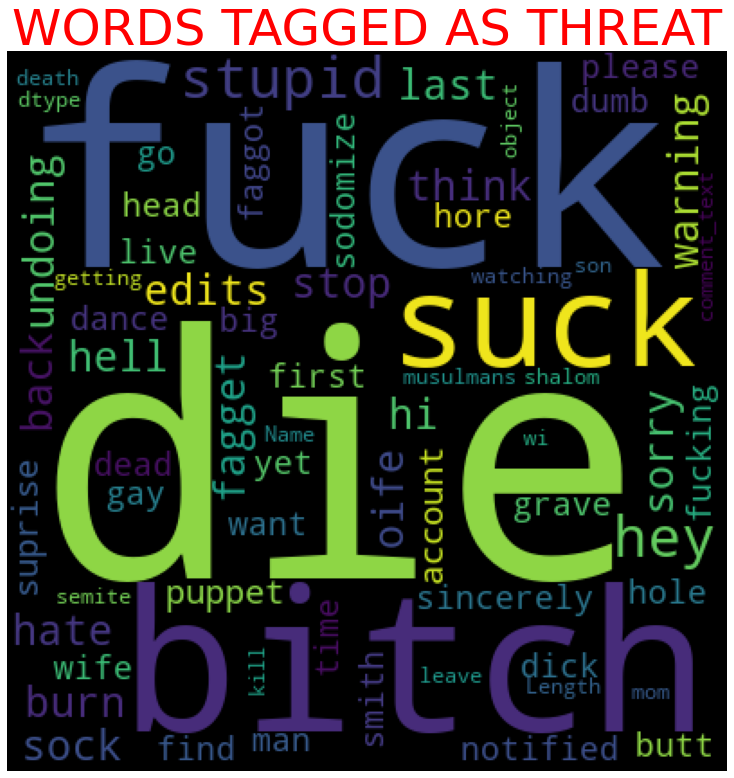

In [127]:
#Plotting for threat
wordcloud = WordCloud(height=400,width=400,max_words=800).generate(str(data_threat['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [128]:
data_abuse = data[(data['abuse'] == 1)]
data_abuse

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89
64,edits good cunt like revert good edits stupid ...,1,0,1,0,1,0,1,311
...,...,...,...,...,...,...,...,...,...
159315,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677
159335,mischievious pubic hair,1,0,0,0,1,0,1,33
159362,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346
159367,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0,1,534


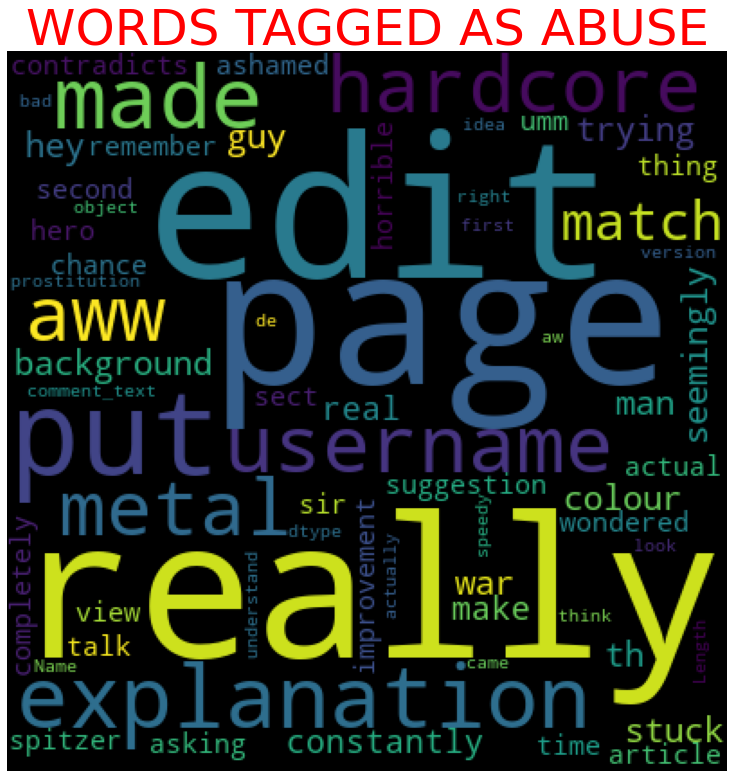

In [129]:
#Plotting for abuse
wordcloud = WordCloud(height=400,width=400,max_words = 800).generate(str(data['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [130]:
data_loathe = data[(data['loathe'] == 1)]
data_loathe

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648
104,pair jew hating weiner nazi schmuck,1,0,1,0,1,1,1,42
175,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,1,128
217,kill nigger hard others said included racist s...,1,0,1,0,1,1,1,120
237,u r tw fuck u gay boy u r smelly fuck ur mum p...,1,0,1,0,1,1,1,58
...,...,...,...,...,...,...,...,...,...
159102,lol gay never know good feel fuck woman as,1,1,1,0,1,1,1,87
159157,oh fuck pansy jew would whine b nai brith beat...,1,0,1,0,1,1,1,110
159221,shalom semite get fuck kill son bitch leave wi...,1,1,1,1,1,1,1,474
159270,think gay fag,1,0,0,0,0,1,1,26


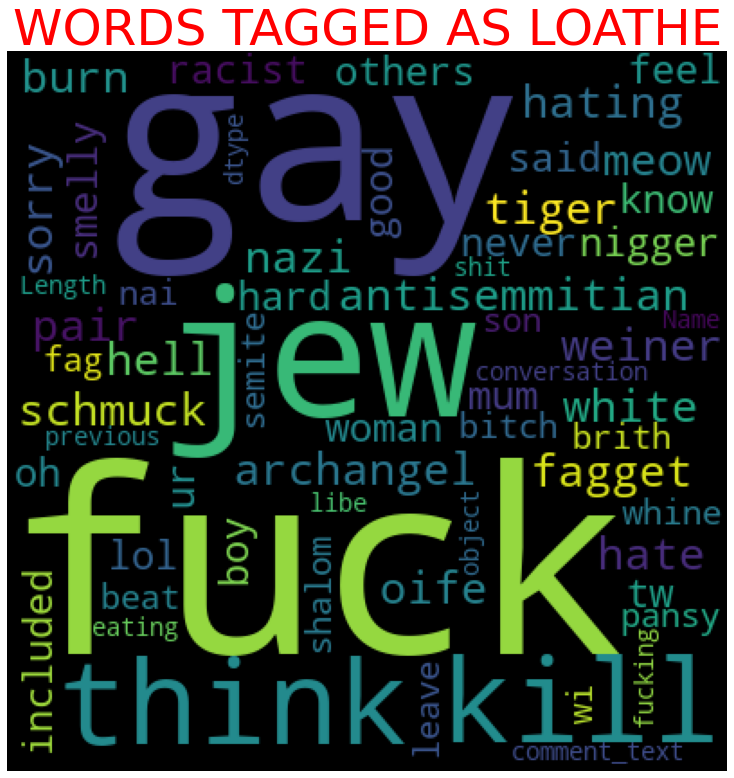

In [131]:
#Plotting for loathe
wordcloud = WordCloud(height=400,width=400,max_words = 800).generate(str(data_loathe['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

From the above wordclouds, we can see that the large texts have more weightage in their respective type of comments whereas small texts have the lesser weightages

In [132]:
#Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [133]:
#Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(data['comment_text'])

In [134]:
y = data['label']

In [135]:
print(X.shape,'\n', y.shape)    #Checking the shape of the data

(159392, 15000) 
 (159392,)


BUILDING THE MODEL

In [136]:
#Splitting the training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)


HANDLING THE IMBALANCED DATA USING OVERSAMPLING TECHNIQUE

In [137]:
#Importing the Oversampling library and Counter
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [138]:
#We are trying to increase the points of minimum label data
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 100235, 1: 11339})
The number of classes after fit Counter({0: 100235, 1: 75176})


In [139]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

In [140]:
#Initializing the instance of the model
LR=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()

In [141]:
models= []
models.append(('Logistic Regression',LR))
models.append(('MultinomialNB',mnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('XGBoostClassifier',xgb))

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.9461918106152495


cross_val_score:  0.9560580132644064


roc_auc_score:  0.8945955203254321


Hamming_loss: 0.053808189384750515


Log_loss : 1.8584982174331495


Classification report:
 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     42958
           1       0.70      0.83      0.76      4860

    accuracy                           0.95     47818
   macro avg       0.84      0.89      0.86     47818
weighted avg       0.95      0.95      0.95     47818



Confusion matrix: 

[[41212  1746]
 [  827  4033]]


AUC_ROC curve:



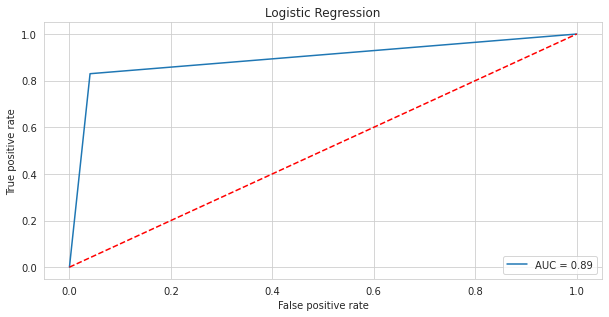





****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.9133798987828851


cross_val_score:  0.9467162733554538


roc_auc_score:  0.8829941179028918


Hamming_loss: 0.0866201012171149


Log_loss : 2.9918089603039353


Classification report:
 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     42958
           1       0.55      0.84      0.66      4860

    accuracy                           0.91     47818
   macro avg       0.76      0.88      0.81     47818
weighted avg       0.94      0.91      0.92     47818



Confusion matrix: 

[[39570  3388]
 [  754  4106]]


AUC_ROC curve:



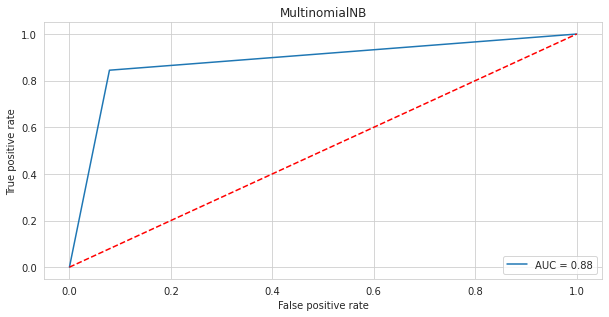





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.9282696892383622


cross_val_score:  0.9400785598060075


roc_auc_score:  0.8416459698313808


Hamming_loss: 0.07173031076163788


Log_loss : 2.477512814761488


Classification report:
 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     42958
           1       0.63      0.73      0.68      4860

    accuracy                           0.93     47818
   macro avg       0.80      0.84      0.82     47818
weighted avg       0.93      0.93      0.93     47818



Confusion matrix: 

[[40826  2132]
 [ 1298  3562]]


AUC_ROC curve:



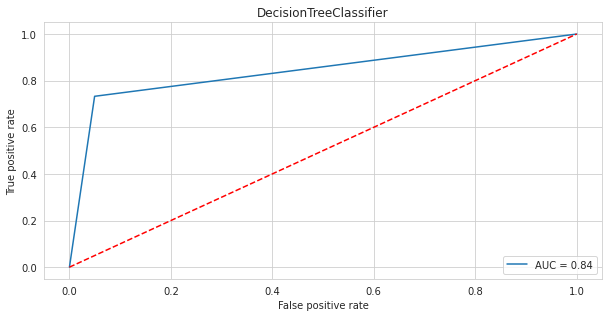





****************************** KNeighborsClassifier ***************************


KNeighborsClassifier()


accuracy_score:  0.7150654565226484


cross_val_score:  0.9166708490499401


roc_auc_score:  0.6530926561056766


Hamming_loss: 0.28493454347735164


Log_loss : 9.841483803725552


Classification report:
 
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     42958
           1       0.19      0.58      0.29      4860

    accuracy                           0.72     47818
   macro avg       0.57      0.65      0.56     47818
weighted avg       0.86      0.72      0.77     47818



Confusion matrix: 

[[31397 11561]
 [ 2064  2796]]


AUC_ROC curve:



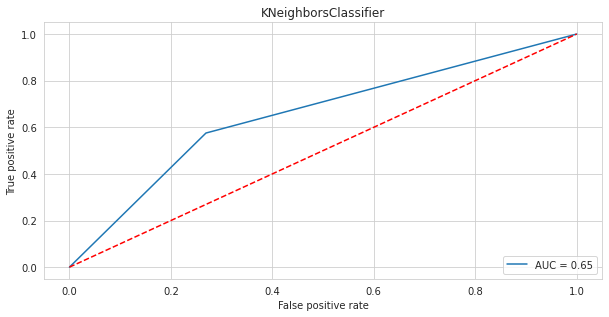





****************************** RandomForestClassifier ***************************


RandomForestClassifier()


accuracy_score:  0.9530302396587059


cross_val_score:  0.956817151204079


roc_auc_score:  0.830244250437359


Hamming_loss: 0.046969760341294076


Log_loss : 1.622289286721371


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     42958
           1       0.83      0.68      0.75      4860

    accuracy                           0.95     47818
   macro avg       0.90      0.83      0.86     47818
weighted avg       0.95      0.95      0.95     47818



Confusion matrix: 

[[42286   672]
 [ 1574  3286]]


AUC_ROC curve:



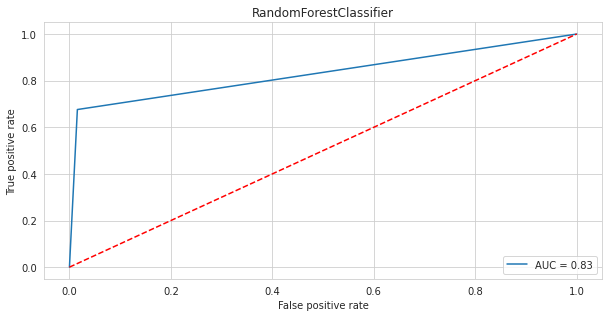





****************************** AdaBoostClassifier ***************************


AdaBoostClassifier()


accuracy_score:  0.9309046802459325


cross_val_score:  0.9459257723137311


roc_auc_score:  0.8194810003914246


Hamming_loss: 0.0690953197540675


Log_loss : 2.38649701170052


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     42958
           1       0.65      0.68      0.67      4860

    accuracy                           0.93     47818
   macro avg       0.81      0.82      0.81     47818
weighted avg       0.93      0.93      0.93     47818



Confusion matrix: 

[[41211  1747]
 [ 1557  3303]]


AUC_ROC curve:



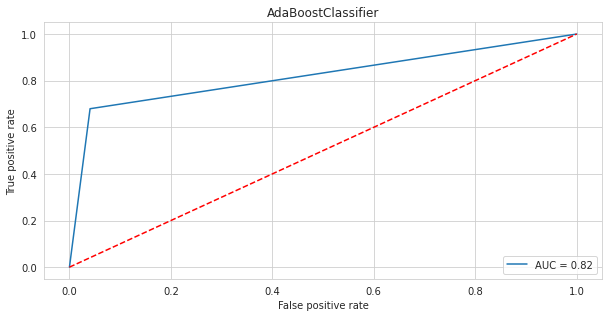





****************************** GradientBoostingClassifier ***************************


GradientBoostingClassifier()


accuracy_score:  0.9451880045171275


cross_val_score:  0.9402353912573943


roc_auc_score:  0.7992370383015509


Hamming_loss: 0.05481199548287256


Log_loss : 1.8931518806123366


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     42958
           1       0.80      0.62      0.70      4860

    accuracy                           0.95     47818
   macro avg       0.88      0.80      0.83     47818
weighted avg       0.94      0.95      0.94     47818



Confusion matrix: 

[[42203   755]
 [ 1866  2994]]


AUC_ROC curve:



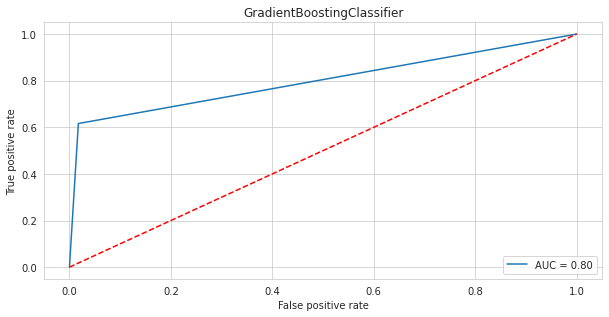





****************************** XGBoostClassifier ***************************


XGBClassifier()


accuracy_score:  0.9458572085825422


cross_val_score:  0.937776047160854


roc_auc_score:  0.795138667359467


Hamming_loss: 0.05414279141745786


Log_loss : 1.8700370365781034


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     42958
           1       0.81      0.61      0.69      4860

    accuracy                           0.95     47818
   macro avg       0.89      0.80      0.83     47818
weighted avg       0.94      0.95      0.94     47818



Confusion matrix: 

[[42284   674]
 [ 1915  2945]]


AUC_ROC curve:



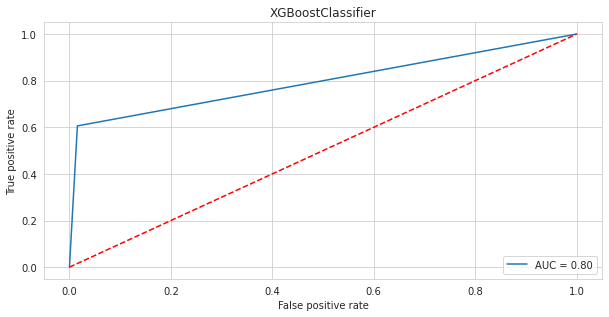

In [142]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
h_loss=[]
l_loss=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_os,y_train_os)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    hloss = hamming_loss(y_test, pre)
    print("Hamming_loss:", hloss)
    h_loss.append(hloss)
    print('\n')
    try : 
        loss = log_loss(y_test, pre)
    except :
            loss = log_loss(y_test, pre.toarray())   
    print("Log_loss :", loss)
    l_loss.append(loss)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(912)
    print('AUC_ROC curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')

In [143]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'roc_auc_score':rocscore,
                    'Hamming_loss':h_loss, 'Log_loss':l_loss})
result

,Model,Accuracy_score,Cross_val_score,roc_auc_score,Hamming_loss,Log_loss
0,Logistic Regression,94.619181,95.605801,89.459552,0.053808,1.858498
1,MultinomialNB,91.337990,94.671627,88.299412,0.086620,2.991809
2,DecisionTreeClassifier,92.826969,94.007856,84.164597,0.071730,2.477513
3,KNeighborsClassifier,71.506546,91.667085,65.309266,0.284935,9.841484
4,RandomForestClassifier,95.303024,95.681715,83.024425,0.046970,1.622289
5,AdaBoostClassifier,93.090468,94.592577,81.948100,0.069095,2.386497
6,GradientBoostingClassifier,94.518800,94.023539,79.923704,0.054812,1.893152
7,XGBoostClassifier,94.585721,93.777605,79.513867,0.054143,1.870037


Since the difference between the accuracy score and cross validation score is minimum in the case of random forest classifier and also its loss is very less. So, we will try hyperparameter tuning on Random Forest Classifier.

HYPERPARAMETER TUNING

In [144]:
#Creating parameter list to pass in GridSearchCV
parameters={'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10],'n_estimators': [50, 100]}

In [145]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)   #Using the best random state we obtained
rfc=GridSearchCV(rfc,parameters,cv=3,scoring='accuracy')
rfc.fit(x_train_os,y_train_os)
print(rfc.best_params_)     #Printing the best parameters obtained
print(rfc.best_score_)      #Mean cross-validated score of best_estimator

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9855368289716281


In [147]:
#FINAL MODEL
#Substituting the best parameters in the Random Forest Classifier:

RFC = RandomForestClassifier(min_samples_leaf =1, min_samples_split = 2, n_estimators = 100)

RFC.fit(x_train_os,y_train_os)
RFC.score(x_test,y_test)

0.9534066669455017

FINIALIZING THE MODEL

In [150]:
rfc_prediction=RFC.predict(X)
#Making a dataframe of predictions
malignant_prediction=pd.DataFrame({'Predictions':rfc_prediction})
malignant_prediction

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
159387,0
159388,0
159389,0
159390,0


In [151]:
#Saving the model
import pickle
filename='MalignantCommentsClassifier_Project.pkl'   #Specifying the filename
pickle.dump(rfc,open(filename,'wb'))  

**TESTING DATA**

In [152]:
from google.colab import files
uploaded = files.upload()

Saving test_data_malignant_project.xlsx to test_data_malignant_project.xlsx


In [153]:
df = pd.read_excel('test_data_malignant_project.xlsx')  
df.head()  #Checking out the top 5 rows of the dataset

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [154]:
df.shape

(153164, 2)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153038 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [156]:
df.isna().sum()

id                0
comment_text    126
dtype: int64

In [157]:
df.describe()

,id,comment_text
count,153164,153038
unique,153164,153026
top,9de038be490e3463,== Sexual Preference and Politics == \n I remo...
freq,1,2


In [158]:
df.dropna(inplace = True)

In [159]:
df = df.reset_index()
del df['index']

In [160]:
#As ID is not much important, we can drop from the dataset
df.drop('id',axis=1,inplace=True)

In [161]:
#Replacing '\n' in comment_text
df['comment_text'] = df['comment_text'].replace('\n',' ')

In [188]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):

    text = re.sub(r'datetime.datetime', '', text)

    text = re.sub(r'ì¼ì´ì‚¼ì‚¬ì˜¤ìœ¡ì¹ íŒ”êµ¬í•˜ê³ ì‹­ì´ìš” ì—í—¤í—¤ ìœ¼í—¤ ìœ¼í—¤ ìœ¼í—ˆí—ˆ', '', text)

    text = re.sub(r'à¸­à¸­à¸ªà¹€à¸•à¸£à¹€à¸¥à¸µà¸¢ à¹€à¸™à¹‡à¸à¸‹à¹Œ à¸—à¹‡à¸­à¸› à¹‚à¸¡à¹€à¸”à¸¥ , à¸¤à¸”à¸¹à¸à¸²à¸¥à¸—à¸µà¹ˆ', '', text)

    text = re.sub(r'§Ù„Ø§Øª Ø§ÙˆØ±Ø¬Ø³ ÙˆØ¬Û Ø³Û’ Ú©ÛŒØ§ Ø¸Ø§ÛØ±ÛŒ ØªÙˆ Ø§ÛŒÚ© ÙØ·Ø±ÛŒ Ø¹Ø¯Ø§ÙˆØª ÛÛŒ Ù„Ú¯ØªÛŒ ÛÛ’Û” ÙˆØ±Ù†Û Ù…Ø§Ø¦ÛŒÚº ØªÙˆ Ø§ÙˆÙ„Ø§Ø¯ Ú©Ùˆ ØµÙÙ„Ø­ Ùˆ Ø§Ù…Ù† Ú©Ø§ ÛÛŒ Ù…Ø´ÙˆØ±Û Ø¯ÛŒØªÛŒ ÛÛŒÚº Ø§Ù„Ø¨ØªÛ Ø§Ù†Ú©Û’ Ø®Ø±ÙˆØ¬ Ø³Û’ Ù†Û ØµØ±Ù Ø¬Ù†Ú¯ Ø¬Ù…Ù„ Ø¸ÛÙˆØ± Ù¾Ø°ÛŒØ± ÛÙˆØ¦ÛŒ Ø¨Ù„Ú©Û Ø¬Ù†Ú¯Ù ØµÙÛŒÙ†ØŒ ÙˆØ§Ù‚Ø¹Û Ø­ÙØ±ÛØŒ Ø³Ø§Ù†Ø­ÛÙ° Ú©Ø±Ø¨Ù„Ø§ Ø§ÙˆØ± Ù†Û Ø¬Ø§Ù†Û’ Ú©ØªÙ†Û’ ÙØªÙ†Û’ Ø¨Ø±Ù¾Ø§ ÛÙˆØ¦Û’ Ø§ÙˆØ± ÛÙˆØªÛ’ Ø±ÛÛŒÚº Ú¯Û’Û”ÛŒÙ‚ÛŒÙ†Ø§Ù‹ Ù…Ø§Úº Ø¬ÛŒ Ú©Ùˆ Ø§Ø³ Ø­Ø¯ÛŒØ« Ù…Ø¨Ø§Ø±Ú©Û Ú©Ø§ Ø¨Ú¾ÛŒ Ø¹Ù„Ù… ÛÙˆÚ¯Ø§ Ø¬Ø³ Ù…ÛŒÚº Ø­Ø¶ÙˆØ± Ø§Ú©Ø±Ù…Ø Ù†Û’ ÙØ±Ù…Ø§ÛŒØ§ â€™â€™Ø¹Ù†Ù‚Ø±ÛŒØ¨ Ù…ÛŒØ±Û’ Ø§ÛÙ„ Ø¨ÛŒØª Ù…ÛŒØ±Û’ Ø¨Ø¹Ø¯ Ù…ÛŒØ±ÛŒ Ø§ÙÙ…Øª Ø³Û’ Ù‚ØªÙ„ Ùˆ ØºØ§Ø±Øª Ø¯ÛŒÚ©Ú¾ÛŒÚº Ú¯Û’ Ø§ÙˆØ± ÛÙ…Ø§Ø±Û’ Ø³Ø¨ Ø³Û’ Ø²ÛŒØ§Ø¯Û Ø¨ØºØ¶ Ø±Ú©Ú¾Ù†Û’ ÙˆØ§Ù„Û’ Ø¯Ø´Ù…Ù† Ø¨Ù†Ùˆ Ø§ÙÙ…ÛŒÛØŒ Ø¨Ù†Ùˆ Ø§Ù„Ù…ØºÛŒØ±Û Ùˆ Ø¨Ù†Ùˆ Ù…Ø®Ø¯ÙˆÙ… ÛÙˆÙ†Ú¯Û’ Ø­Ø¯ÛŒØ« ØµØ­ÛŒØ­ Ø¨Ø®Ø§Ø±ÛŒ Ø¨Ø§Ø¨ Ø§Ù„ÙØªÙ† Ù†Ù…Ø¨Ø± ÛÛ” â€˜â€˜ Ù…Ù†Ø¯Ø±Ø¬Û Ø°ÛŒÙ„ Ú†ÛŒØ¯Û Ú†ÛŒØ¯Û ÙˆØ§Ù‚Ø¹Ø§Øª Ø¹Ø§Ù„Ù… Ø§Ø³Ù„Ø§Ù… Ù…ÛŒÚº Ø¨Ø¯ Ù†', '', text)
    
    text = re.sub(r'== è¹©è„šè‹±è¯­ == è‹±è¯­å¥½çƒ‚å‘€ï¼æœ€è¿‘è·Ÿç»´åŸºç”¨æˆ·æœ‰äº‹è¦è¯´ï¼Œæ— å¥ˆå‡ ä¹Žä¸ä¼šè‹±è¯­ï¼Œè¯´ä¸äº†è¯ã€‚ä½ å¾—å¸®å¸®æˆ‘å‘€ï¼è¿™æ¬¡è¦åˆ é™¤æ–‡ç« ï¼Œä½ å‘Šè¯‰ä»–è¡Œä¸è¡Œï¼Ÿ', '', text)

    text = re.sub(r'PÃ«r IlirÃ«t jemi marr vesh tani. Mos u brengos pÃ«r kÃ«tÃ« artikull mÃ«.', '', text)

    text = re.sub(r'Ø£Ø³Ù Ø£Ø®ÙŠ Ø£ÙŠ Ù‚Ø¨Ù„ Ø§Ù„Ø§Ø³Ù„Ø§Ù… ØŒ ÙˆÙ„Ø³Øª Ø¹Ø±Ø¨ÙŠØ©', '', text)

    text = re.sub(r'== Ø¯ÙˆÙ…ÛŒÙ† Ù…ØªÙ† Ù…Ø¨Ø§Ø­Ø«Ù‡ Ø¨Ø§ Ù…ÙˆØ¶ÙˆØ¹ Ø§Ø®ØªØµØ§ØµÛŒ Ø¯Ø§Ø¹Ø´ Ùˆ Ø§Ø³Ø±Ø§Ø¦ÛŒÙ„(Ø±ÛŒÛŒØ³ Ø¬Ù…Ù‡ÙˆØ±ÛŒ Ø§Ø³Ø±Ø§Ø¦ÛŒÙ„) == Ø¨Ø§ Ø¹Ø±Ø¶ Ø³Ù„Ø§Ù… Ø®Ø¯Ù…Øª Ø±ÛŒØ§Ø³Øª Ø¬Ù…Ù‡ÙˆØ±ÛŒ Ø§Ø³Ø±Ø§Ø¦ÛŒÙ„ Ùˆ Ù†ÛŒØ² Ø§Ø¹Ø¶Ø§ÛŒ Ø¢Ù† Ùˆ Ù†ÛŒØ² Ø§Ù‚ÙˆØ§Ù… Ùˆ ', '', text)

    text = re.sub(r' Ø±Ø­ØªÙˆ ÙÙŠÙ‡Ø§ Ø§Ø¹Ø¯Ù…ÙƒÙ… Ù…Ø³ØªØ± Ø³ÙƒØ±Ø¨Øª ', '', text)

    text = re.sub(r'Ø­ÙŠÙ†Ù…Ø§ Ø§ÙƒØªØ¨ Ù„Ùƒ Ø¨Ø§Ù„Ø¹Ø±Ø¨ÙŠØ© ÙƒÙ„Ø§Ù…ÙŠ ÙŠØ¨Ù‚Ù‰ ÙˆØ­ÙŠÙ† Ø§ÙƒØªØ¨ Ø¨Ø§Ù„Ø£Ù†Ø¬Ù„ÙŠØ²ÙŠØ© ÙŠÙ…Ø³Ø­  ) Ù„Ø§ Ø§Ø¹Ø±Ù Ù„Ù…Ø§Ø°Ø§ Ù„ÙƒÙ† Ù‡Ù„ ØªØ¹Ø±Ù Ø§Ù„Ø¹Ø±Ø¨ÙŠØ©..ØŸ Ø§Ù„Ù…Ù‡Ù… Ø§Ù†Ø§ Ø§Ø±ÙŠØ¯ Ø§Ù† Ù†ØªØ¹Ø§ÙˆÙ†', '', text)

    text = re.sub(r'BÃ i Ä‘á»™i tuyá»ƒn quá»‘c gia viá»‡t nam bÃªn tiáº¿ng viá»‡t. Ä‘Ã©o máº¹ vá»«a xÃ³a cáº£ Ä‘á»‘ng ná»™i dung tao Ä‘Æ°a vÃ o mÃ  giá» giáº£ bá»™ ngÃ¢y thÆ¡ kÃªu tao khÃ´ng lÃ m Ã . ChÆ°a ká»ƒ mÃ y cÃ²n Ä‘á»• tao phÃ¡ hoáº¡i ná»¯a, tháº±ng Äƒn cáº¯p la lÃ ng.', '', text)

    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)

    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [189]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
df['comment_text'] = df['comment_text'].apply(clean_comments)
df['comment_text']

error: ignored

In [168]:
#Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [169]:
test_vec = tf_vec.fit_transform(df['comment_text'])
test_vec

AttributeError: ignored

In [ ]:
test_vec.shape

In [ ]:
#Checking our vectorized test data
test_vec

In [170]:
#Loading the model
fitted_model = pickle.load(open('MalignantCommentsClassifier_Project.pkl','rb'))
fitted_model

RandomForestClassifier()

In [190]:
#Predictions
test_prediction = RFC.predict(df['comment_text'])
test_df = pd.DataFrame({'Predictions':test_prediction})
test_df

ValueError: ignored

In [ ]:
#Test predictions
test_results = pd.DataFrame(test_df)
test_results.to_csv('Malignant_TestDataPredictions.csv')